In [162]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [53]:
df = pd.read_csv("C:\\Users\\nelviton.santos\\Desktop\\Analista de Dados\\StudentsPerformance.csv")

In [54]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [55]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [59]:
df['mean score'] = ((df['math score'] + df['reading score'] + df['writing score'])/3).round()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0
1,female,group C,some college,standard,completed,69,90,88,82.0
2,female,group B,master's degree,standard,none,90,95,93,93.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0
4,male,group C,some college,standard,none,76,78,75,76.0
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0
996,male,group C,high school,free/reduced,none,62,55,55,57.0
997,female,group C,high school,free/reduced,completed,59,71,65,65.0
998,female,group D,some college,standard,completed,68,78,77,74.0


In [65]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [79]:
df.groupby(['parental level of education']).mean()

C:\Users\nelviton.santos\AppData\Local\Temp\ipykernel_8112\3943126127.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['parental level of education']).mean()


,math score,reading score,writing score,mean score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.558559
bachelor's degree,69.389831,73.000000,73.381356,71.949153
high school,62.137755,64.704082,62.448980,63.122449
master's degree,69.745763,75.372881,75.677966,73.576271
some college,67.128319,69.460177,68.840708,68.446903
some high school,63.497207,66.938547,64.888268,65.072626


In [ ]:
Verificamos que os pais com escolaridade superior tendem a ter filhos com média de notas maiores.

In [94]:
df.groupby(['parental level of education']).mean()

C:\Users\nelviton.santos\AppData\Local\Temp\ipykernel_8112\3943126127.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['parental level of education']).mean()


,math score,reading score,writing score,mean score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.558559
bachelor's degree,69.389831,73.000000,73.381356,71.949153
high school,62.137755,64.704082,62.448980,63.122449
master's degree,69.745763,75.372881,75.677966,73.576271
some college,67.128319,69.460177,68.840708,68.446903
some high school,63.497207,66.938547,64.888268,65.072626


In [107]:
df.groupby(['parental level of education','test preparation course'])['gender'].count().reset_index()

,parental level of education,test preparation course,gender
0,associate's degree,completed,82
1,associate's degree,none,140
2,bachelor's degree,completed,46
3,bachelor's degree,none,72
4,high school,completed,56
5,high school,none,140
6,master's degree,completed,20
7,master's degree,none,39
8,some college,completed,77
9,some college,none,149


In [109]:
df.groupby(['parental level of education']).agg({'gender': 'count', 'mean score': 'mean'})

,gender,mean score
parental level of education,,
associate's degree,222,69.558559
bachelor's degree,118,71.949153
high school,196,63.122449
master's degree,59,73.576271
some college,226,68.446903
some high school,179,65.072626


In [133]:
def aprovacao (apr):
    if apr > 90:
        return ('Superou')
    elif apr > 70:
        return ('Bom')
    elif apr > 50:
        return ('Medio')
    elif apr > 30:
        return ('Regular')
    elif apr <= 30:
        return ('Atenção')
    

    

In [134]:
df['status'] = df['mean score'].apply(aprovacao)
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,status
0,female,group B,bachelor's degree,standard,none,72,72,74,73.0,Bom
1,female,group C,some college,standard,completed,69,90,88,82.0,Bom
2,female,group B,master's degree,standard,none,90,95,93,93.0,Superou
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.0,Regular
4,male,group C,some college,standard,none,76,78,75,76.0,Bom
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.0,Superou
996,male,group C,high school,free/reduced,none,62,55,55,57.0,Medio
997,female,group C,high school,free/reduced,completed,59,71,65,65.0,Medio
998,female,group D,some college,standard,completed,68,78,77,74.0,Bom


In [136]:
df[df['status'] == 'Superou']['gender'].count()

47

In [139]:
df.groupby(['parental level of education','status'])['status'].count()

parental level of education  status 
associate's degree           Bom         95
                             Medio       93
                             Regular     20
                             Superou     14
bachelor's degree            Bom         50
                             Medio       46
                             Regular     10
                             Superou     12
high school                  Atenção      3
                             Bom         58
                             Medio      101
                             Regular     32
                             Superou      2
master's degree              Bom         28
                             Medio       24
                             Regular      1
                             Superou      6
some college                 Atenção      3
                             Bom         93
                             Medio      104
                             Regular     16
                             Superou   

In [ ]:
Nenhum dos alunos com pais que tem formação superior ficou com nota abaixo de 30.


In [141]:
df[df['status'] == 'Atenção']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,status
17,female,group B,some high school,free/reduced,none,18,32,28,26.0,Atenção
59,female,group C,some high school,free/reduced,none,0,17,10,9.0,Atenção
76,male,group E,some high school,standard,none,30,26,22,26.0,Atenção
211,male,group C,some college,free/reduced,none,35,28,27,30.0,Atenção
327,male,group A,some college,free/reduced,none,28,23,19,23.0,Atenção
338,female,group B,some high school,free/reduced,none,24,38,27,30.0,Atenção
596,male,group B,high school,free/reduced,none,30,24,15,23.0,Atenção
601,female,group C,high school,standard,none,29,29,30,29.0,Atenção
787,female,group B,some college,standard,none,19,38,32,30.0,Atenção
980,female,group B,high school,free/reduced,none,8,24,23,18.0,Atenção


In [143]:
df[df['status'] == 'Atenção']['status'].count()

10

In [ ]:
Nenhum dos alunos que tiveram notas abaixo de 30 realizaram o curso preparatório.

In [144]:
df[df['status'] == 'Superou']

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score,status
2,female,group B,master's degree,standard,none,90,95,93,93.0,Superou
6,female,group B,some college,standard,completed,88,95,92,92.0,Superou
104,male,group C,some college,standard,completed,98,86,90,91.0,Superou
106,female,group D,master's degree,standard,none,87,100,100,96.0,Superou
114,female,group E,bachelor's degree,standard,completed,99,100,100,100.0,Superou
121,male,group B,associate's degree,standard,completed,91,89,92,91.0,Superou
122,female,group C,some college,standard,completed,88,93,93,91.0,Superou
149,male,group E,associate's degree,free/reduced,completed,100,100,93,98.0,Superou
165,female,group C,bachelor's degree,standard,completed,96,100,100,99.0,Superou
179,female,group D,some high school,standard,completed,97,100,100,99.0,Superou


In [146]:
df[df['status'] == 'Superou']['status'].count()

47

In [ ]:
Ao analisar as notas máximas identificamos que a não realização do curso preparatório ou a influencia dos pais não teve impacto
nos resultados dos alunos que se destacaram seja por qual for o fator externo não identificado, visto que tivemos alunos com 
medias acima de 90 sem realização de curso e com pais formados no ensino médio.

In [ ]:
Segue abaixo alguns gráficos referente as análises realizadas acima:

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, "master's degree"),
  Text(0.0, 0, 'some college'),
  Text(1.0, 0, "associate's degree"),
  Text(2.0, 0, 'high school'),
  Text(3.0, 0, 'some high school'),
  Text(4.0, 0, "bachelor's degree"),
  Text(5.0, 0, "master's degree"),
  Text(6.0, 0, '')])

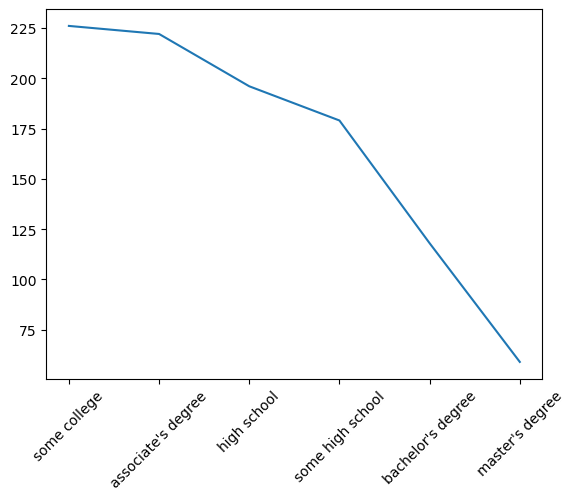

In [163]:
df['parental level of education'].value_counts().plot()
plt.xticks(rotation=45)

In [164]:
df.groupby(['parental level of education']).mean()

C:\Users\nelviton.santos\AppData\Local\Temp\ipykernel_8112\3943126127.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['parental level of education']).mean()


,math score,reading score,writing score,mean score
parental level of education,,,,
associate's degree,67.882883,70.927928,69.896396,69.558559
bachelor's degree,69.389831,73.000000,73.381356,71.949153
high school,62.137755,64.704082,62.448980,63.122449
master's degree,69.745763,75.372881,75.677966,73.576271
some college,67.128319,69.460177,68.840708,68.446903
some high school,63.497207,66.938547,64.888268,65.072626


<BarContainer object of 1000 artists>

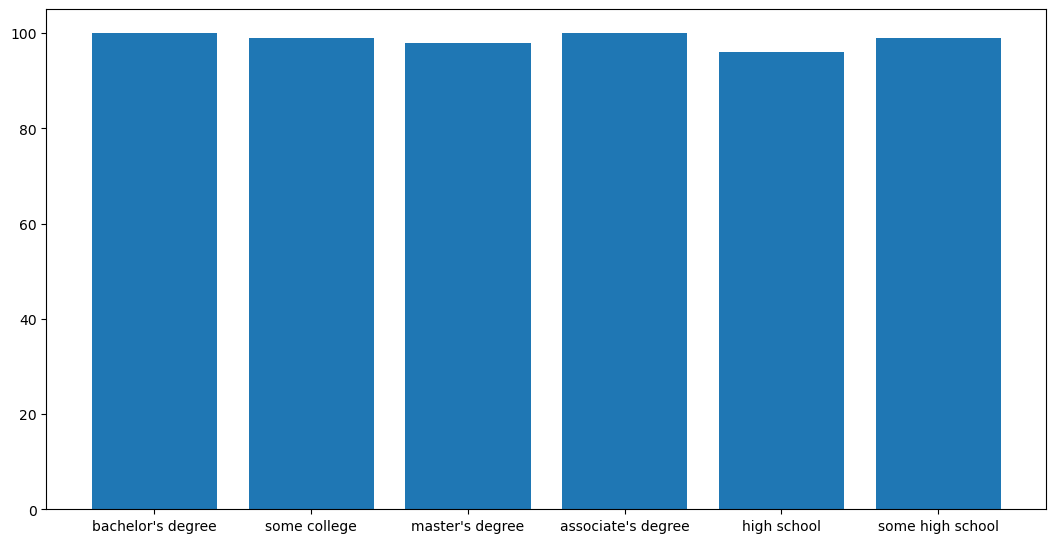

In [182]:
janela = plt.figure(figsize = (10,5))
grafico = janela.add_axes([0,0,1,1])
grafico.bar(df['parental level of education'], df['mean score'])

In [209]:
x = np.array(df['status']=='Atenção')
y = np.array(df['parental level of education'])


<BarContainer object of 1000 artists>

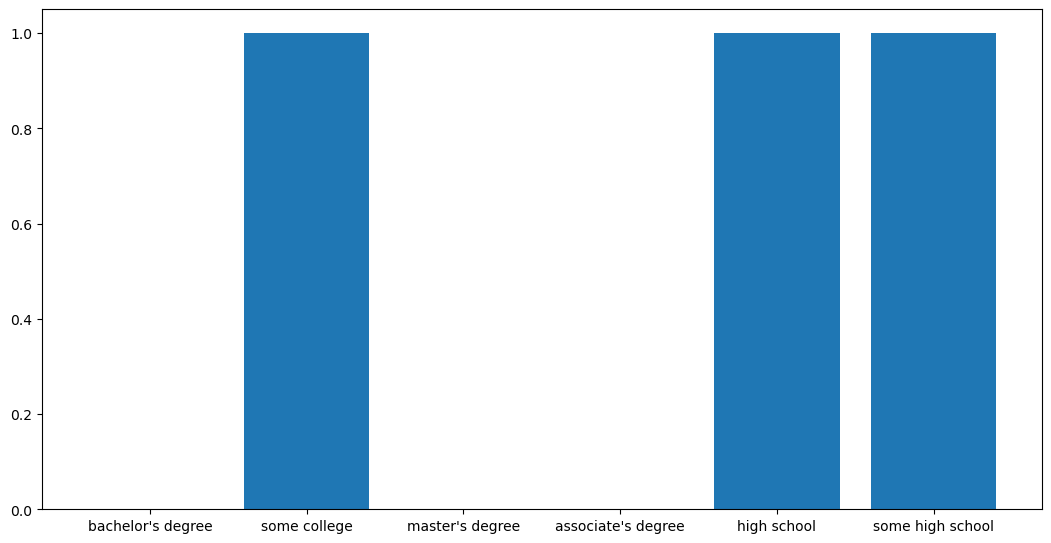

In [211]:

janela = plt.figure(figsize = (10,5))
grafico = janela.add_axes([0,0,1,1])
grafico.bar(y,x)